In [1]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt

In [5]:
# funcs


## calc loss of initial layers using SGD algorithm
## using a net with dims of n0, n1, reurn the contribuition of each layer
def calc_loss_SGD(n0,n1):
  # creating input vector and initial weights
  mu_x=0
  sigma_x= 1
  x_vec = torch.randn(n0)
  z = torch.tensor(1.)

  # setting up the network
  class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 1/n0)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 1/n1)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat
  #define the net
  net = Net(n0, n1)
  w1_init = net.fc1.weight.clone()
  w2_init = net.fc2.weight.clone()
  loss_f = nn.MSELoss()
  optimizer = optim.SGD(net.parameters(), lr = 0.001)
  # training the net
  steps = 20

  for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    optimizer.step()
  # w1- init w2-final
  with torch.no_grad():
    w1_final=net.fc1.weight.clone()
    w2_final=net.fc2.weight.clone()

    net.fc1.weight[:] = w1_init
    z_hat_1 = net(x_vec.float())
    loss_1 = loss_f(z_hat_1.float(), z.float())

  # w1- final w2-init
  with torch.no_grad():
    net.fc1.weight[:] = w1_final
    net.fc2.weight[:]=w2_init
    z_hat_2 = net(x_vec.float())
    loss_2 = loss_f(z_hat_2.float(), z.float())


  return loss_1 , loss_2


## calc loss of initial layers using ADAM algorithm
## using a net with dims of n0, n1, reurn the contribuition of each layer
def calc_loss_ADAM(n0,n1):
  # creating input vector and initial weights
  mu_x=0
  sigma_x= 1
  x_vec = torch.randn(n0)
  z = torch.tensor(1.)

  # setting up the network
  class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 1/n0)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 1/n1)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat
  #define the net
  net = Net(n0, n1)
  w1_init = net.fc1.weight.clone()
  w2_init = net.fc2.weight.clone()
  loss_f = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr = 0.001)
  # training the net
  steps = 20

  for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    optimizer.step()
  # w1- init w2-final
  with torch.no_grad():
    w1_final=net.fc1.weight.clone()
    w2_final=net.fc2.weight.clone()

    net.fc1.weight[:] = w1_init
    z_hat_1 = net(x_vec.float())
    loss_1 = loss_f(z_hat_1.float(), z.float())

  # w1- final w2-init
  with torch.no_grad():
    net.fc1.weight[:] = w1_final
    net.fc2.weight[:]=w2_init
    z_hat_2 = net(x_vec.float())
    loss_2 = loss_f(z_hat_2.float(), z.float())


  return loss_1 , loss_2


In [28]:
# run n0=n1 from 1 to 5000 and calc the loss by reseting each layer
# results for SGD and ADAM algorithm
l1_loss_SGD=[]
l2_loss_SGD=[]
l1_loss_ADAM=[]
l2_loss_ADAM=[]
for  n in range(1, 5000, 20):
  # using SGD algorithm
  l1_loss , l2_loss=calc_loss_SGD(n,n)
  l1_loss_SGD.append(l1_loss)
  l2_loss_SGD.append(l2_loss)

  # using ADAM algorithm
  l1_loss , l2_loss=calc_loss_ADAM(n,n)
  l1_loss_ADAM.append(l1_loss)
  l2_loss_ADAM.append(l2_loss)



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 0.98, 'Losses vs n')

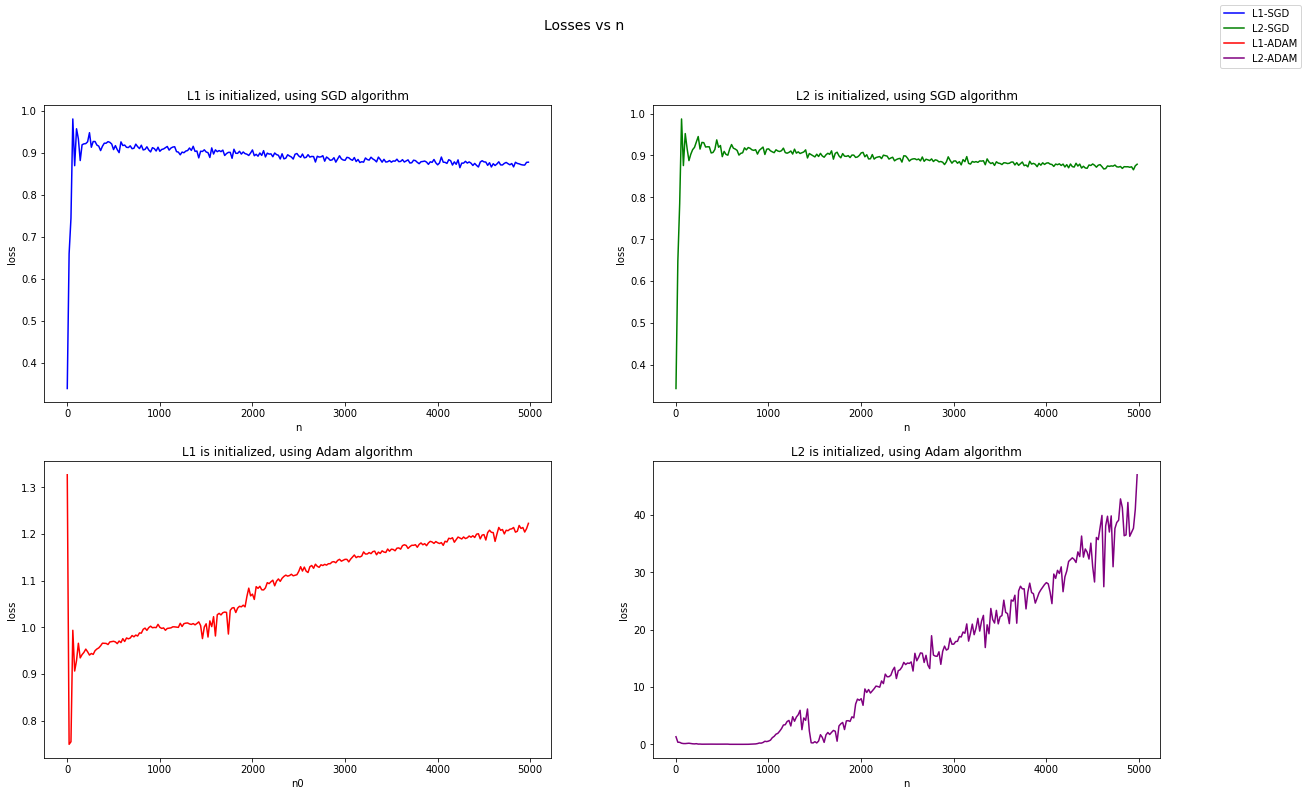

In [32]:
# plotting results

#ax.imshow(face)

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(221)

x=np.arange(1, 5000, 20)

ax.plot(x,l1_loss_SGD,label="L1-SGD",c="blue")
plt.ylabel('loss')
plt.xlabel('n')
ax.set_title("L1 is initialized, using SGD algorithm")


ax = fig.add_subplot(222)
ax.plot(x,l2_loss_SGD,label="L2-SGD",c="green")
plt.ylabel('loss')
plt.xlabel('n')
ax.set_title("L2 is initialized, using SGD algorithm")


ax = fig.add_subplot(223)
ax.plot(x,l1_loss_ADAM,label="L1-ADAM",c="red")
plt.ylabel('loss')
plt.xlabel('n')
ax.set_title("L1 is initialized, using Adam algorithm")


ax = fig.add_subplot(224)
ax.plot(x,l2_loss_ADAM,label="L2-ADAM",c="purple")

fig.legend()

plt.ylabel('loss')
plt.xlabel('n')
ax.set_title("L2 is initialized, using Adam algorithm")

fig.suptitle("Losses vs n", fontsize=14)


Text(0.5, 0.98, 'LogLog')

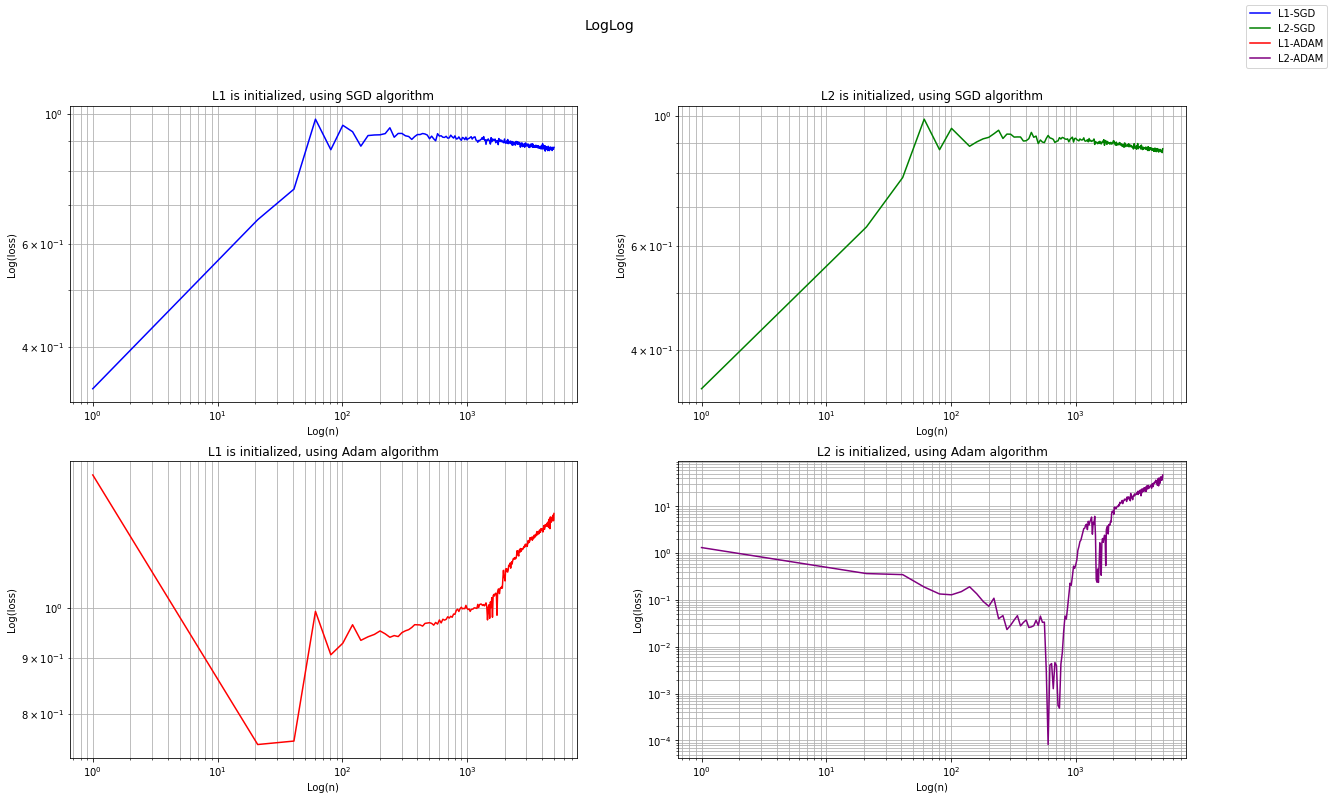

In [40]:
## log log plot

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(221)

x=np.arange(1, 5000, 20)

ax.loglog(x,l1_loss_SGD,label="L1-SGD",c="blue")
ax.set_ylabel('Log(loss)')
ax.set_xlabel('Log(n)')
ax.set_title("L1 is initialized, using SGD algorithm")
ax.grid(True, which="both", ls="-")



ax = fig.add_subplot(222)
ax.loglog(x,l2_loss_SGD,label="L2-SGD",c="green")
ax.set_ylabel('Log(loss)')
ax.set_xlabel('Log(n)')
ax.set_title("L2 is initialized, using SGD algorithm")
ax.grid(True, which="both", ls="-")



ax = fig.add_subplot(223)
ax.loglog(x,l1_loss_ADAM,label="L1-ADAM",c="red")
ax.set_ylabel('Log(loss)')
ax.set_xlabel('Log(n)')
ax.set_title("L1 is initialized, using Adam algorithm")
ax.grid(True, which="both", ls="-")



ax = fig.add_subplot(224)
ax.loglog(x,l2_loss_ADAM,label="L2-ADAM",c="purple")
ax.grid(True, which="both", ls="-")


fig.legend()

ax.set_ylabel('Log(loss)')
ax.set_xlabel('Log(n)')
ax.set_title("L2 is initialized, using Adam algorithm")
ax.grid(True, which="both", ls="-")


fig.suptitle("LogLog", fontsize=14)


Text(0.5, 0.98, 'LogLog')

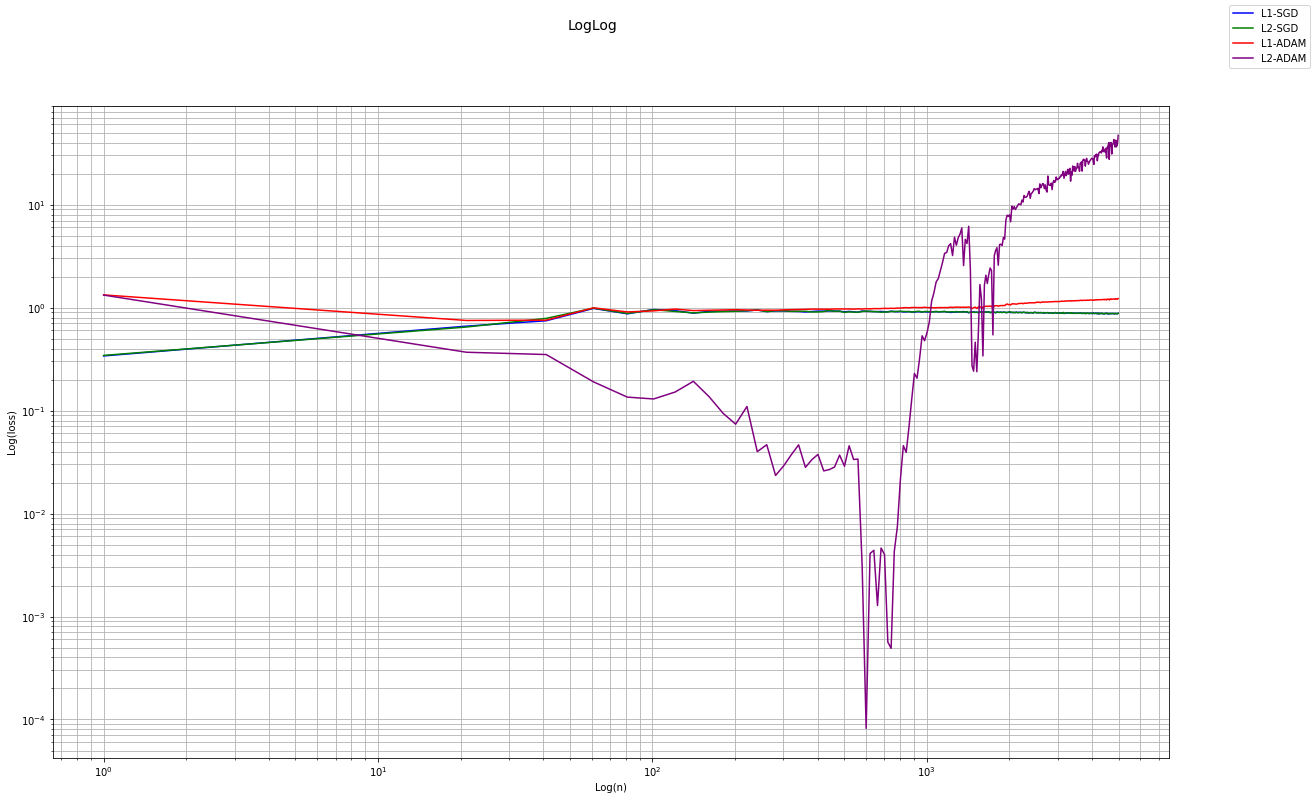

In [43]:
# plot loglog smae ax

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)

x=np.arange(1, 5000, 20)

ax.loglog(x,l1_loss_SGD,label="L1-SGD",c="blue")




ax.loglog(x,l2_loss_SGD,label="L2-SGD",c="green")



ax.loglog(x,l1_loss_ADAM,label="L1-ADAM",c="red")



ax.loglog(x,l2_loss_ADAM,label="L2-ADAM",c="purple")


fig.legend()

ax.set_ylabel('Log(loss)')
ax.set_xlabel('Log(n)')
ax.grid(True, which="both", ls="-")


fig.suptitle("LogLog", fontsize=14)
